In [1]:
#  Import pandas
import pandas as pd

#  Read the dataset
df = pd.read_csv("lung_clinical_data.csv")

# Display basic info
print("Dataset Shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())

print("\nColumn Names:")
print(df.columns.tolist())

Dataset Shape: (1299, 143)

First 5 rows:
    OS  OS.time  DSS  DSS.time  DFI  DFI.time  PFI  PFI.time  Redaction  \
0  0.0      0.0  0.0       0.0  NaN       NaN  0.0       0.0        NaN   
1  0.0   1523.0  0.0    1523.0  NaN       NaN  0.0    1523.0        NaN   
2  1.0    121.0  NaN     121.0  NaN       NaN  0.0     121.0        NaN   
3  0.0    607.0  0.0     607.0  1.0     334.0  1.0     334.0        NaN   
4  0.0    426.0  0.0     426.0  NaN       NaN  1.0     183.0        NaN   

          sampleID  ...  _GENOMIC_ID_TCGA_LUNG_exp_HiSeqV2_exon  \
0  TCGA-05-4244-01  ...    e6a101b9-61f9-4ed1-a59f-d9db3fdb4555   
1  TCGA-05-4249-01  ...    d1a8d88d-1708-4959-9695-6f2e67853bd5   
2  TCGA-05-4250-01  ...    bba9333a-09f7-4585-b22e-e4ae4049f7da   
3  TCGA-05-4382-01  ...    e4177b01-6898-4bb7-b38d-0c09f85c5668   
4  TCGA-05-4384-01  ...    7d6cf896-b04a-431a-a192-aaf540eeaf77   

   _GENOMIC_ID_TCGA_LUNG_hMethyl27 _GENOMIC_ID_TCGA_LUNG_mutation  \
0     TCGA-05-4244-01A-01D-1104-05 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Check missing values per column
print("Missing values per column:\n")
missing_values = df.isnull().sum().sort_values(ascending=False)
print(missing_values[missing_values > 0])

# Total missing values in entire dataset
total_missing = df.isnull().sum().sum()
print(f"\nTotal missing values in dataset: {total_missing}")

# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")


Missing values per column:

Redaction                              1299
RET_translocation                      1297
ALK_translocation                      1296
ROS1_translocation                     1293
anatomic_neoplasm_subdivision_other    1286
                                       ... 
icd_10                                   67
icd_o_3_site                             67
informed_consent_verified                67
sample_type_id                           63
sample_type                              63
Length: 137, dtype: int64

Total missing values in dataset: 84506

Number of duplicate rows: 0


In [3]:
print(df.columns.tolist())

['OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction', 'sampleID', 'ABSOLUTE_Ploidy', 'ABSOLUTE_Purity', 'AKT1', 'ALK_translocation', 'BRAF', 'CBL', 'CTNNB1', 'Canonical_mut_in_KRAS_EGFR_ALK', 'Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2', 'EGFR', 'ERBB2', 'ERBB4', 'Estimated_allele_fraction_of_a_clonal_varnt_prsnt_t_1_cpy_pr_cll', 'Expression_Subtype', 'HRAS', 'KRAS', 'MAP2K1', 'MET', 'NRAS', 'PIK3CA', 'PTPN11', 'Pathology', 'Pathology_Updated', 'RET_translocation', 'ROS1_translocation', 'STK11', 'WGS_as_of_20120731_0_no_1_yes', '_INTEGRATION', '_PANCAN_CNA_PANCAN_K8', '_PANCAN_Cluster_Cluster_PANCAN', '_PANCAN_DNAMethyl_PANCAN', '_PANCAN_RPPA_PANCAN_K8', '_PANCAN_UNC_RNAseq_PANCAN_K16', '_PANCAN_miRNA_PANCAN', '_PANCAN_mutation_PANCAN', '_PATIENT', '_cohort', '_primary_disease', '_primary_site', 'additional_pharmaceutical_therapy', 'additional_radiation_therapy', 'additional_surgery_locoregional_procedure', 'additional_surgery_met

In [4]:
# Step 1: Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Drop rows with missing values in OS.time
numeric_df = numeric_df.dropna(subset=['OS.time'])




In [5]:
print(df.columns.tolist())

['OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'Redaction', 'sampleID', 'ABSOLUTE_Ploidy', 'ABSOLUTE_Purity', 'AKT1', 'ALK_translocation', 'BRAF', 'CBL', 'CTNNB1', 'Canonical_mut_in_KRAS_EGFR_ALK', 'Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2', 'EGFR', 'ERBB2', 'ERBB4', 'Estimated_allele_fraction_of_a_clonal_varnt_prsnt_t_1_cpy_pr_cll', 'Expression_Subtype', 'HRAS', 'KRAS', 'MAP2K1', 'MET', 'NRAS', 'PIK3CA', 'PTPN11', 'Pathology', 'Pathology_Updated', 'RET_translocation', 'ROS1_translocation', 'STK11', 'WGS_as_of_20120731_0_no_1_yes', '_INTEGRATION', '_PANCAN_CNA_PANCAN_K8', '_PANCAN_Cluster_Cluster_PANCAN', '_PANCAN_DNAMethyl_PANCAN', '_PANCAN_RPPA_PANCAN_K8', '_PANCAN_UNC_RNAseq_PANCAN_K16', '_PANCAN_miRNA_PANCAN', '_PANCAN_mutation_PANCAN', '_PATIENT', '_cohort', '_primary_disease', '_primary_site', 'additional_pharmaceutical_therapy', 'additional_radiation_therapy', 'additional_surgery_locoregional_procedure', 'additional_surgery_met

In [6]:
# Drop columns with more than % missing values
threshold = 0.9  # 10%
df = df.loc[:, df.isnull().mean() < threshold]
# Print the dropped columns
print("Dropped columns (more than 10% missing values):")
print(df)

Dropped columns (more than 10% missing values):
       OS  OS.time  DSS  DSS.time  DFI  DFI.time  PFI  PFI.time  \
0     0.0      0.0  0.0       0.0  NaN       NaN  0.0       0.0   
1     0.0   1523.0  0.0    1523.0  NaN       NaN  0.0    1523.0   
2     1.0    121.0  NaN     121.0  NaN       NaN  0.0     121.0   
3     0.0    607.0  0.0     607.0  1.0     334.0  1.0     334.0   
4     0.0    426.0  0.0     426.0  NaN       NaN  1.0     183.0   
...   ...      ...  ...       ...  ...       ...  ...       ...   
1294  NaN      NaN  NaN       NaN  NaN       NaN  NaN       NaN   
1295  NaN      NaN  NaN       NaN  NaN       NaN  NaN       NaN   
1296  NaN      NaN  NaN       NaN  NaN       NaN  NaN       NaN   
1297  NaN      NaN  NaN       NaN  NaN       NaN  NaN       NaN   
1298  NaN      NaN  NaN       NaN  NaN       NaN  NaN       NaN   

             sampleID  ABSOLUTE_Ploidy  ...  \
0     TCGA-05-4244-01              NaN  ...   
1     TCGA-05-4249-01             3.77  ...   
2     

In [7]:
print(df.columns.tolist())

['OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'sampleID', 'ABSOLUTE_Ploidy', 'ABSOLUTE_Purity', 'AKT1', 'BRAF', 'CBL', 'CTNNB1', 'Canonical_mut_in_KRAS_EGFR_ALK', 'Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2', 'EGFR', 'ERBB2', 'ERBB4', 'Estimated_allele_fraction_of_a_clonal_varnt_prsnt_t_1_cpy_pr_cll', 'Expression_Subtype', 'HRAS', 'KRAS', 'MAP2K1', 'MET', 'NRAS', 'PIK3CA', 'PTPN11', 'Pathology', 'Pathology_Updated', 'STK11', 'WGS_as_of_20120731_0_no_1_yes', '_INTEGRATION', '_PANCAN_CNA_PANCAN_K8', '_PANCAN_Cluster_Cluster_PANCAN', '_PANCAN_DNAMethyl_PANCAN', '_PANCAN_RPPA_PANCAN_K8', '_PANCAN_UNC_RNAseq_PANCAN_K16', '_PANCAN_miRNA_PANCAN', '_PANCAN_mutation_PANCAN', '_PATIENT', '_cohort', '_primary_disease', '_primary_site', 'additional_pharmaceutical_therapy', 'additional_radiation_therapy', 'additional_surgery_locoregional_procedure', 'additional_surgery_metastatic_procedure', 'age_at_initial_pathologic_diagnosis', 'anatomic_neoplasm

In [8]:
# Separate numeric and categorical columns
numeric_cols = df.select_dtypes(include='number').columns
categorical_cols = df.select_dtypes(exclude='number').columns

# Fill missing values
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())
df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


<ipython-input-8-93299b38c336>:7: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[categorical_cols] = df[categorical_cols].fillna(df[categorical_cols].mode().iloc[0])


In [9]:
# Print columns with remaining missing values (after dropping fully empty ones)
missing_after_cleaning = df.isnull().sum()
missing_after_cleaning = missing_after_cleaning[missing_after_cleaning > 0].sort_values(ascending=False)

print("Remaining columns with missing values after dropping fully empty ones:\n")
print(missing_after_cleaning)

# Total remaining missing values
total_missing_remaining = df.isnull().sum().sum()
print(f"\nTotal remaining missing values: {total_missing_remaining}")


Remaining columns with missing values after dropping fully empty ones:

Series([], dtype: int64)

Total remaining missing values: 0


In [10]:
print(df.columns.tolist())


['OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'sampleID', 'ABSOLUTE_Ploidy', 'ABSOLUTE_Purity', 'AKT1', 'BRAF', 'CBL', 'CTNNB1', 'Canonical_mut_in_KRAS_EGFR_ALK', 'Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2', 'EGFR', 'ERBB2', 'ERBB4', 'Estimated_allele_fraction_of_a_clonal_varnt_prsnt_t_1_cpy_pr_cll', 'Expression_Subtype', 'HRAS', 'KRAS', 'MAP2K1', 'MET', 'NRAS', 'PIK3CA', 'PTPN11', 'Pathology', 'Pathology_Updated', 'STK11', 'WGS_as_of_20120731_0_no_1_yes', '_INTEGRATION', '_PANCAN_CNA_PANCAN_K8', '_PANCAN_Cluster_Cluster_PANCAN', '_PANCAN_DNAMethyl_PANCAN', '_PANCAN_RPPA_PANCAN_K8', '_PANCAN_UNC_RNAseq_PANCAN_K16', '_PANCAN_miRNA_PANCAN', '_PANCAN_mutation_PANCAN', '_PATIENT', '_cohort', '_primary_disease', '_primary_site', 'additional_pharmaceutical_therapy', 'additional_radiation_therapy', 'additional_surgery_locoregional_procedure', 'additional_surgery_metastatic_procedure', 'age_at_initial_pathologic_diagnosis', 'anatomic_neoplasm

In [11]:
# Show number of unique values for each column
unique_counts = df.nunique().sort_values(ascending=False)

print("Number of unique values per column:\n")
print(unique_counts)


Number of unique values per column:

_INTEGRATION                                1299
sampleID                                    1299
bcr_sample_barcode                          1231
_GENOMIC_ID_TCGA_LUNG_exp_HiSeqV2_PANCAN    1129
_GENOMIC_ID_TCGA_LUNG_exp_HiSeqV2_exon      1129
                                            ... 
_cohort                                        1
days_to_initial_pathologic_diagnosis           1
is_ffpe                                        1
informed_consent_verified                      1
tumor_tissue_site                              1
Length: 130, dtype: int64


In [12]:
# Drop columns with only 1 unique value
to_drop = df.columns[df.nunique() == 1].tolist()

# Also drop high-cardinality ID-like columns
id_like_cols = ['_INTEGRATION', 'bcr_sample_barcode']  # Add others if needed

df_cleaned = df.drop(columns=to_drop + id_like_cols, errors='ignore')

print("Dropped columns:", to_drop + id_like_cols)


Dropped columns: ['_cohort', '_primary_site', 'days_to_initial_pathologic_diagnosis', 'informed_consent_verified', 'is_ffpe', 'tumor_tissue_site', '_INTEGRATION', 'bcr_sample_barcode']


In [ ]:
print(df.columns.tolist())

['OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'sampleID', 'ABSOLUTE_Ploidy', 'ABSOLUTE_Purity', 'AKT1', 'BRAF', 'CBL', 'CTNNB1', 'Canonical_mut_in_KRAS_EGFR_ALK', 'Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2', 'EGFR', 'ERBB2', 'ERBB4', 'Estimated_allele_fraction_of_a_clonal_varnt_prsnt_t_1_cpy_pr_cll', 'Expression_Subtype', 'HRAS', 'KRAS', 'MAP2K1', 'MET', 'NRAS', 'PIK3CA', 'PTPN11', 'Pathology', 'Pathology_Updated', 'STK11', 'WGS_as_of_20120731_0_no_1_yes', '_INTEGRATION', '_PANCAN_CNA_PANCAN_K8', '_PANCAN_Cluster_Cluster_PANCAN', '_PANCAN_DNAMethyl_PANCAN', '_PANCAN_RPPA_PANCAN_K8', '_PANCAN_UNC_RNAseq_PANCAN_K16', '_PANCAN_miRNA_PANCAN', '_PANCAN_mutation_PANCAN', '_PATIENT', '_cohort', '_primary_disease', '_primary_site', 'additional_pharmaceutical_therapy', 'additional_radiation_therapy', 'additional_surgery_locoregional_procedure', 'additional_surgery_metastatic_procedure', 'age_at_initial_pathologic_diagnosis', 'anatomic_neoplasm

In [13]:
# Step 1: Drop columns with only 1 unique value
columns_to_drop = df.columns[df.nunique() == 1]
df_cleaned = df.drop(columns=columns_to_drop, errors='ignore')

# Step 2: Display updated shape
print(f"Shape after removing constant columns: {df.shape}")

# Step 3: Show number of unique values per column (sorted)
print("\nUnique values per column after cleaning:\n")
print(df_cleaned.nunique().sort_values(ascending=False))


Shape after removing constant columns: (1299, 130)

Unique values per column after cleaning:

sampleID                                     1299
_INTEGRATION                                 1299
bcr_sample_barcode                           1231
_GENOMIC_ID_TCGA_LUNG_exp_HiSeqV2            1129
_GENOMIC_ID_TCGA_LUNG_exp_HiSeqV2_exon       1129
                                             ... 
pulmonary_function_test_performed               2
tissue_retrospective_collection_indicator       2
tissue_prospective_collection_indicator         2
vial_number                                     2
vital_status                                    2
Length: 124, dtype: int64


In [14]:
print("Remaining columns after cleaning:")
print(df_cleaned.columns.tolist())

Remaining columns after cleaning:
['OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'sampleID', 'ABSOLUTE_Ploidy', 'ABSOLUTE_Purity', 'AKT1', 'BRAF', 'CBL', 'CTNNB1', 'Canonical_mut_in_KRAS_EGFR_ALK', 'Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2', 'EGFR', 'ERBB2', 'ERBB4', 'Estimated_allele_fraction_of_a_clonal_varnt_prsnt_t_1_cpy_pr_cll', 'Expression_Subtype', 'HRAS', 'KRAS', 'MAP2K1', 'MET', 'NRAS', 'PIK3CA', 'PTPN11', 'Pathology', 'Pathology_Updated', 'STK11', 'WGS_as_of_20120731_0_no_1_yes', '_INTEGRATION', '_PANCAN_CNA_PANCAN_K8', '_PANCAN_Cluster_Cluster_PANCAN', '_PANCAN_DNAMethyl_PANCAN', '_PANCAN_RPPA_PANCAN_K8', '_PANCAN_UNC_RNAseq_PANCAN_K16', '_PANCAN_miRNA_PANCAN', '_PANCAN_mutation_PANCAN', '_PATIENT', '_primary_disease', 'additional_pharmaceutical_therapy', 'additional_radiation_therapy', 'additional_surgery_locoregional_procedure', 'additional_surgery_metastatic_procedure', 'age_at_initial_pathologic_diagnosis', 'anatomic_ne

In [15]:
# Restore 'OS.time' column from original df to df_cleaned
df_cleaned['OS.time'] = df['OS.time']
df_cleaned['OS'] = df['OS']
# Restore DSS.time and PFI.time from the original dataframe
df_cleaned['DSS.time'] = df['DSS.time']
df_cleaned['PFI.time'] = df['PFI.time']
df_cleaned['DFI.time'] = df['DFI.time']
df_cleaned['residual_tumor'] = df['residual_tumor']
df_cleaned['gender'] = df['gender']

# Confirm restoration
print("Restored columns:", ['DSS.time', 'PFI.time','DFI.time','residual_tumor'])
print(df_cleaned[['DSS.time', 'PFI.time','DFI.time','residual_tumor']].head())

Restored columns: ['DSS.time', 'PFI.time', 'DFI.time', 'residual_tumor']
   DSS.time  PFI.time  DFI.time residual_tumor
0       0.0       0.0     670.5             RX
1    1523.0    1523.0     670.5             R0
2     121.0     121.0     670.5             R2
3     607.0     334.0     334.0             R0
4     426.0     183.0     670.5             RX


In [16]:
# Drop 'sampleID' and '_PATIENT' columns safely (only if they exist)
df_cleaned = df_cleaned.drop(columns=['sampleID', '_PATIENT'], errors='ignore')

# Confirm dropped
print("Dropped 'sampleID' and '_PATIENT' columns ")
print("Remaining columns:\n", df_cleaned.columns.tolist())  # preview first 10 columns


Dropped 'sampleID' and '_PATIENT' columns 
Remaining columns:
 ['OS', 'OS.time', 'DSS', 'DSS.time', 'DFI', 'DFI.time', 'PFI', 'PFI.time', 'ABSOLUTE_Ploidy', 'ABSOLUTE_Purity', 'AKT1', 'BRAF', 'CBL', 'CTNNB1', 'Canonical_mut_in_KRAS_EGFR_ALK', 'Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2', 'EGFR', 'ERBB2', 'ERBB4', 'Estimated_allele_fraction_of_a_clonal_varnt_prsnt_t_1_cpy_pr_cll', 'Expression_Subtype', 'HRAS', 'KRAS', 'MAP2K1', 'MET', 'NRAS', 'PIK3CA', 'PTPN11', 'Pathology', 'Pathology_Updated', 'STK11', 'WGS_as_of_20120731_0_no_1_yes', '_INTEGRATION', '_PANCAN_CNA_PANCAN_K8', '_PANCAN_Cluster_Cluster_PANCAN', '_PANCAN_DNAMethyl_PANCAN', '_PANCAN_RPPA_PANCAN_K8', '_PANCAN_UNC_RNAseq_PANCAN_K16', '_PANCAN_miRNA_PANCAN', '_PANCAN_mutation_PANCAN', '_primary_disease', 'additional_pharmaceutical_therapy', 'additional_radiation_therapy', 'additional_surgery_locoregional_procedure', 'additional_surgery_metastatic_procedure', 'age_at_initial_pathologic_diagnosis', 'anatom

In [17]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Identify categorical columns (non-numeric types)
categorical_cols = df_cleaned.select_dtypes(include=['object', 'category']).columns

# Step 2: Apply LabelEncoder to each categorical column
label_encoder = LabelEncoder()
for col in categorical_cols:
    try:
        df_cleaned[col] = label_encoder.fit_transform(df_cleaned[col].astype(str))
    except Exception as e:
        print(f"Could not encode column {col}: {e}")

# Step 3: Confirm encoding
print("Label encoding complete.")



Label encoding complete.


In [18]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Make a preview DataFrame with both columns
df_pathology_preview = df_cleaned[['Pathology', 'Pathology_Updated']].copy()

# Initialize encoders
le_pathology = LabelEncoder()
le_pathology_updated = LabelEncoder()

# Apply encoding (convert to string to handle NaNs)
df_pathology_preview['Pathology_encoded'] = le_pathology.fit_transform(df_pathology_preview['Pathology'].astype(str))
df_pathology_preview['Pathology_Updated_encoded'] = le_pathology_updated.fit_transform(df_pathology_preview['Pathology_Updated'].astype(str))

# Create mapping tables
pathology_mapping = pd.DataFrame({
    'Pathology': le_pathology.classes_,
    'Pathology_encoded': range(len(le_pathology.classes_))
})

pathology_updated_mapping = pd.DataFrame({
    'Pathology_Updated': le_pathology_updated.classes_,
    'Pathology_Updated_encoded': range(len(le_pathology_updated.classes_))
})

# Display both mappings
print("Pathology Encoding:\n")
print(pathology_mapping)

print("\nPathology_Updated Encoding:\n")
print(pathology_updated_mapping)


Pathology Encoding:

   Pathology  Pathology_encoded
0          0                  0
1          1                  1
2         10                  2
3          2                  3
4          3                  4
5          4                  5
6          5                  6
7          6                  7
8          7                  8
9          8                  9
10         9                 10

Pathology_Updated Encoding:

  Pathology_Updated  Pathology_Updated_encoded
0                 0                          0
1                 1                          1
2                 2                          2
3                 3                          3
4                 4                          4
5                 5                          5
6                 6                          6
7                 7                          7
8                 8                          8


In [19]:
# Step 1: Select label-encoded categorical columns
categorical_cols = df_cleaned.select_dtypes(include=['int64', 'int32']).columns

# Step 2: Filter those with low unique values (likely encoded categories)
categorical_cols = [col for col in categorical_cols if df_cleaned[col].nunique() <= 20 and col != 'OS.time']

# Step 3: Compute correlation with OS.time
print("Correlation of categorical variables with OS.time:\n")
for col in categorical_cols:
    corr = df_cleaned[[col, 'OS.time']].dropna().corr().iloc[0,1]
    print(f"{col}: {corr:.3f}")


Correlation of categorical variables with OS.time:

AKT1: -0.003
BRAF: 0.031
CBL: 0.017
CTNNB1: -0.004
Canonical_mut_in_KRAS_EGFR_ALK: -0.036
Cnncl_mt_n_KRAS_EGFR_ALK_RET_ROS1_BRAF_ERBB2_HRAS_NRAS_AKT1_MAP2: -0.036
ERBB2: -0.014
Expression_Subtype: -0.007
HRAS: -0.000
KRAS: -0.047
MAP2K1: 0.023
MET: -0.015
NRAS: -0.017
PIK3CA: 0.018
PTPN11: -0.027
Pathology: -0.007
Pathology_Updated: -0.007
_PANCAN_CNA_PANCAN_K8: 0.047
_PANCAN_Cluster_Cluster_PANCAN: 0.008
_PANCAN_DNAMethyl_PANCAN: 0.009
_PANCAN_RPPA_PANCAN_K8: 0.022
_PANCAN_UNC_RNAseq_PANCAN_K16: 0.006
_PANCAN_miRNA_PANCAN: 0.007
_PANCAN_mutation_PANCAN: 0.003
_primary_disease: -0.008
additional_pharmaceutical_therapy: 0.025
additional_radiation_therapy: -0.006
additional_surgery_locoregional_procedure: 0.061
additional_surgery_metastatic_procedure: -0.025
anatomic_neoplasm_subdivision: 0.061
egfr_mutation_performed: -0.048
eml4_alk_translocation_performed: -0.035
followup_case_report_form_submission_reason: 0.002
followup_treatment_s

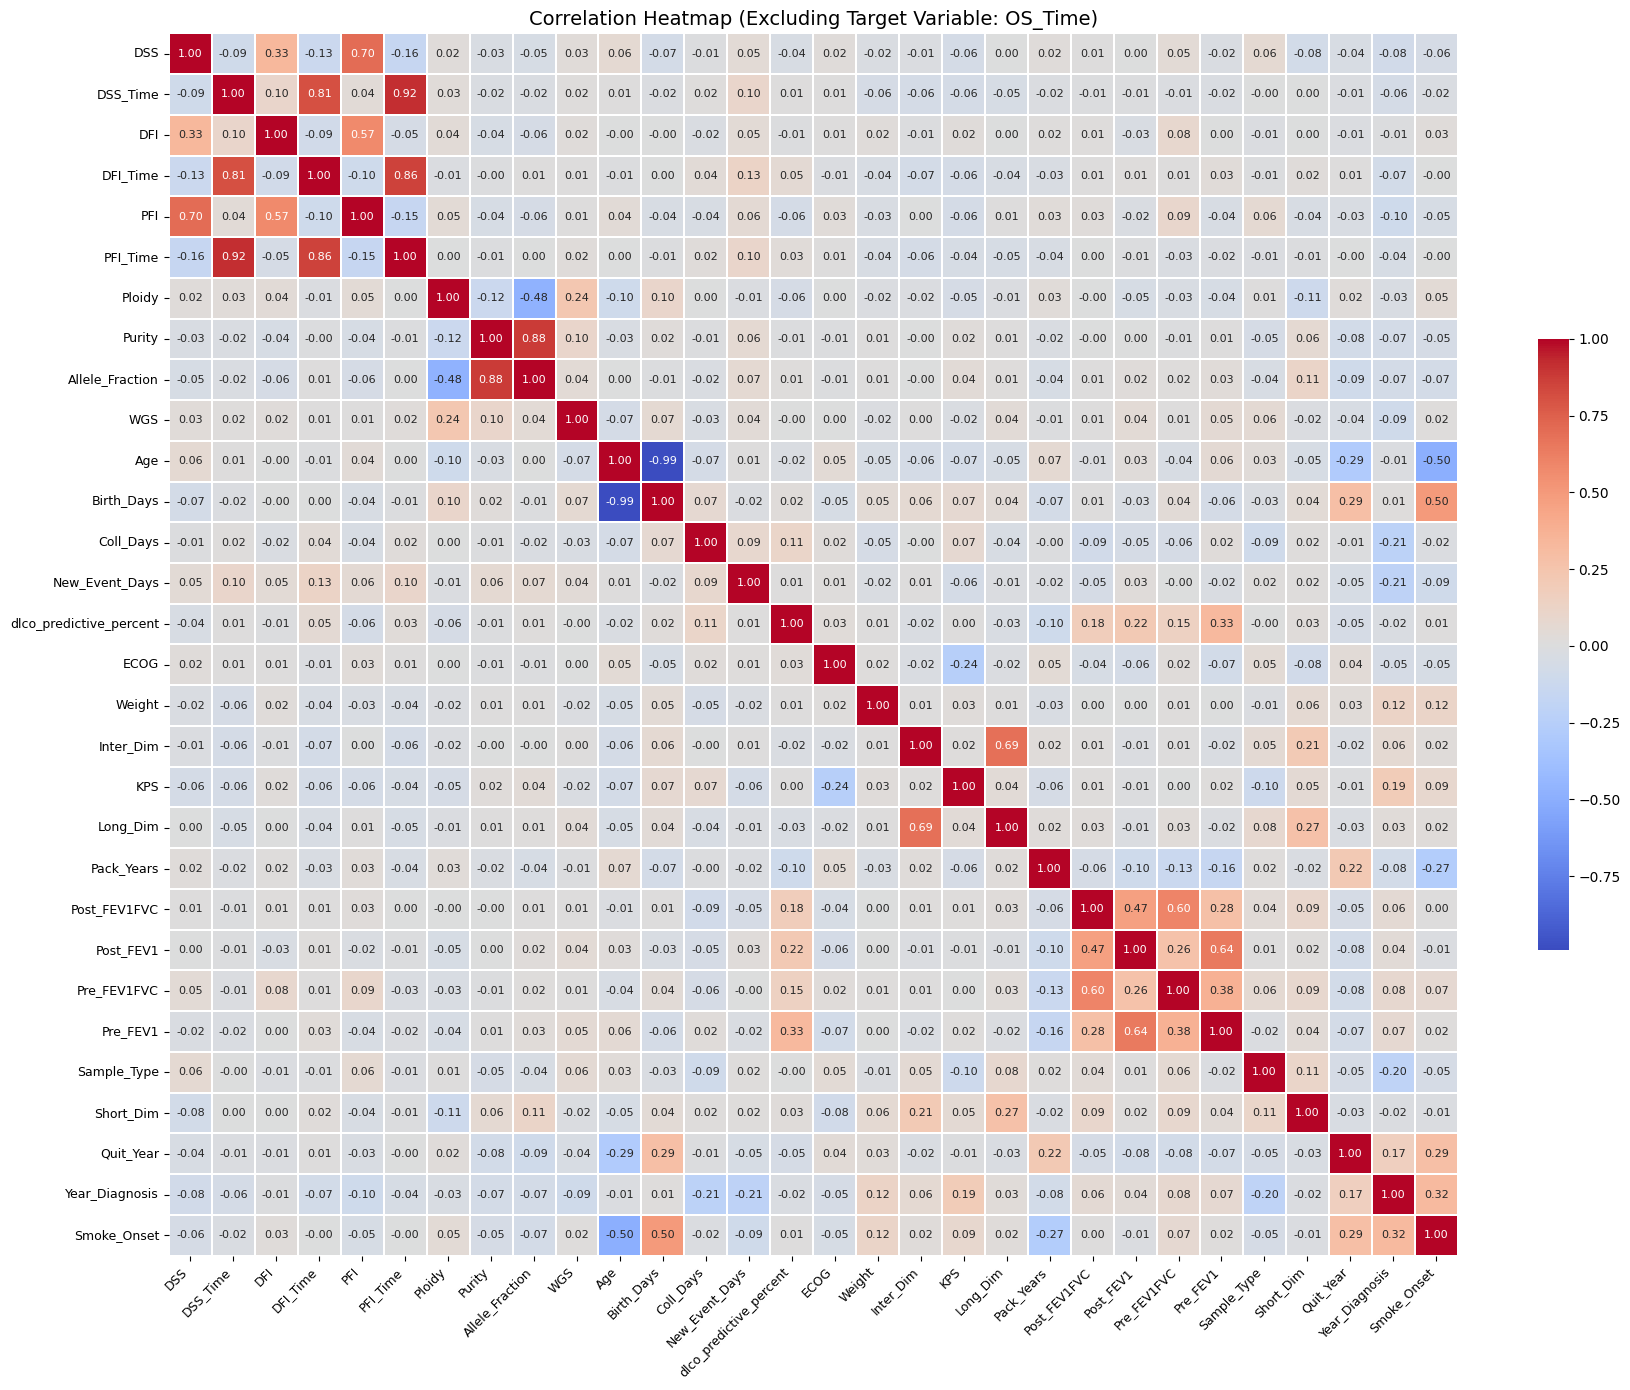

In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# ✅ Step 1: Rename all long column names to short ones — NO duplicates!
df.rename(columns={
    'DSS': 'DSS',
    'DSS.time': 'DSS_Time',
    'DFI': 'DFI',
    'DFI.time': 'DFI_Time',
    'PFI': 'PFI',
    'PFI.time': 'PFI_Time',
    'FFI.time': 'FFI_Time',
    'ABSOLUTE_Ploidy': 'Ploidy',
    'ABSOLUTE_Purity': 'Purity',
    'Estimated_allele_fraction_of_a_clonal_varnt_prsnt_t_1_cpy_pr_cll': 'Allele_Fraction',
    'WGS_as_of_20120731_0_no_1_yes': 'WGS',
    'age_at_initial_pathologic_diagnosis': 'Age',
    'days_to_birth': 'Birth_Days',
    'days_to_collection': 'Coll_Days',
    'days_to_new_tumor_event_after_initial_treatment': 'New_Event_Days',
    'dco_predictive_percent': 'DCO_Predict',
    'eastern_cancer_oncology_group': 'ECOG',
    'initial_weight': 'Weight',
    'intermediate_dimension': 'Inter_Dim',
    'karnofsky_performance_score': 'KPS',
    'longest_dimension': 'Long_Dim',
    'number_pack_years_smoked': 'Pack_Years',
    'post_bronchodilator_fev1_fvc_percent': 'Post_FEV1FVC',
    'post_bronchodilator_fev1_percent': 'Post_FEV1',
    'pre_bronchodilator_fev1_fvc_percent': 'Pre_FEV1FVC',
    'pre_bronchodilator_fev1_percent': 'Pre_FEV1',
    'sample_type_id': 'Sample_Type',
    'shortest_dimension': 'Short_Dim',
    'stopped_smoking_year': 'Quit_Year',
    'year_of_initial_pathologic_diagnosis': 'Year_Diagnosis',
    'year_of_tobacco_smoking_onset': 'Smoke_Onset',
    'OS.time': 'OS_Time'
}, inplace=True)

# ✅ Step 2: Extract the numeric columns from the RENAMED df
numeric_df = df.select_dtypes(include=[np.number])

# ✅ Step 3: Compute correlation matrix
correlation_matrix = numeric_df.corr()

# ✅ Step 4: Exclude target variable and any others you don't want in the heatmap
targets_to_exclude = ['OS_Time', 'OS', 'days_to_initial_pathologic_diagnosis']
heatmap_matrix = correlation_matrix.drop(labels=targets_to_exclude, axis=0, errors='ignore')
heatmap_matrix = heatmap_matrix.drop(labels=targets_to_exclude, axis=1, errors='ignore')

# ✅ Step 5: Clean any NaN or infinite values
heatmap_matrix_clean = heatmap_matrix.replace([np.inf, -np.inf], np.nan).fillna(0)

# ✅ Step 6: Plot
plt.figure(figsize=(18, 14))
sns.heatmap(
    heatmap_matrix_clean,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    linewidths=0.3,
    cbar_kws={'shrink': 0.5},
    annot_kws={"size": 8}
)
plt.xticks(rotation=45, ha='right', fontsize=9)
plt.yticks(fontsize=9)
plt.title("Correlation Heatmap (Excluding Target Variable: OS_Time)", fontsize=14)
plt.tight_layout()
plt.show()






In [ ]:
print('residual_tumor' in df_cleaned.columns)


True


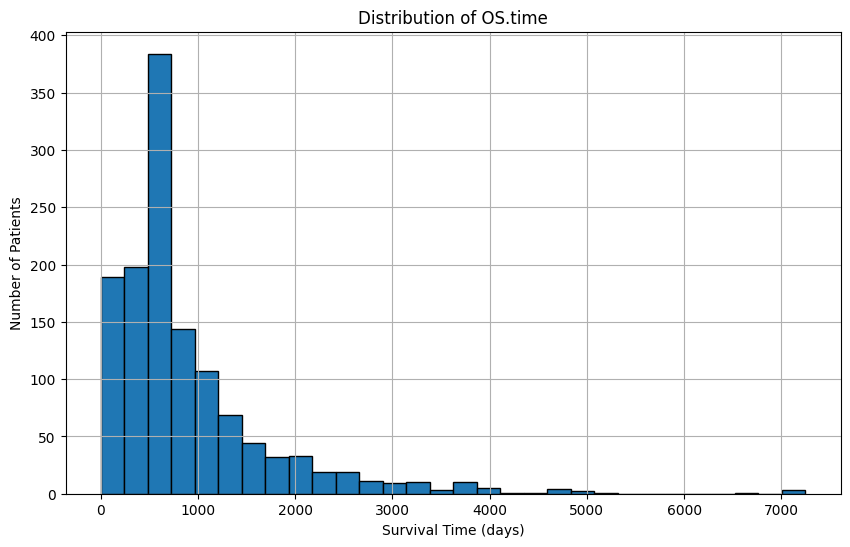

In [ ]:
df = pd.read_csv("lung_clinical_data.csv")

import matplotlib.pyplot as plt

# Drop missing values to ensure clean plot
os_time_clean = df_cleaned['OS.time'].dropna()

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(os_time_clean, bins=30, edgecolor='black')
plt.title('Distribution of OS.time')
plt.xlabel('Survival Time (days)')
plt.ylabel('Number of Patients')
plt.grid(True)
plt.show()



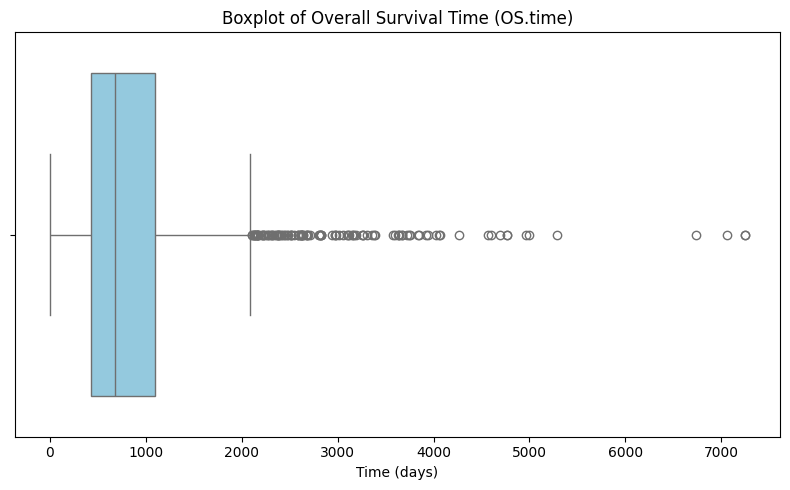

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic boxplot of OS.time
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['OS.time'], color='skyblue')
plt.title("Boxplot of Overall Survival Time (OS.time)")
plt.xlabel("Time (days)")
plt.tight_layout()
plt.show()


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Compute IQR bounds
# Apply IQR filtering again
Q1_2 = df_no_outliers['OS.time'].quantile(0.25)
Q3_2 = df_no_outliers['OS.time'].quantile(0.75)
IQR_2 = Q3_2 - Q1_2

lower_2 = Q1_2 - 1.5 * IQR_2
upper_2 = Q3_2 + 1.5 * IQR_2

df_no_outliers_2 = df_no_outliers[(df_no_outliers['OS.time'] >= lower_2) & (df_no_outliers['OS.time'] <= upper_2)]

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 2: Filter out outliers
df_no_outliers = df_cleaned[(df_cleaned['OS.time'] >= lower_bound) & (df_cleaned['OS.time'] <= upper_bound)]

# Step 3: Plot boxplot without outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_no_outliers['OS.time'], color='lightgreen')
plt.title("Boxplot of OS.time After Removing Outliers (IQR Method)")
plt.xlabel("Time (days)")
plt.tight_layout()
plt.show()
sns.boxplot(x=df_cleaned['OS.time'], color='skyblue', showfliers=False)


NameError: name 'df_no_outliers' is not defined

<ipython-input-25-cf6656a26372>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=os_counts.values, palette='pastel')


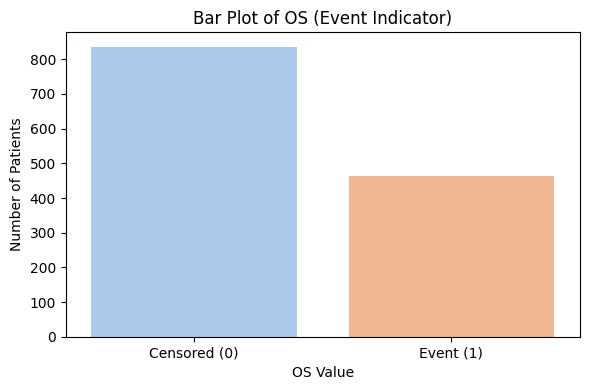

In [ ]:
# Count values of OS (0 = censored, 1 = event)
os_counts = df_cleaned['OS'].value_counts().sort_index()

# Define labels for clarity
labels = ['Censored (0)', 'Event (1)']

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=os_counts.values, palette='pastel')
plt.title('Bar Plot of OS (Event Indicator)')
plt.ylabel('Number of Patients')
plt.xlabel('OS Value')
plt.tight_layout()
plt.show()


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.3/349.3 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.7/115.7 kB 7.4 MB/s eta 0:00:00
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4030 sha256=c7c359df56d9c24aa02cb60664ea64b32b65dd760e3d1f9076f6658056584477
  Stored in directory: /root/.cache/pip/wheels/8b/67/f4/2caaae2146198dcb824f31a303833b07b14a5ec863fb3acd7b
Successfully built autograd-gamma


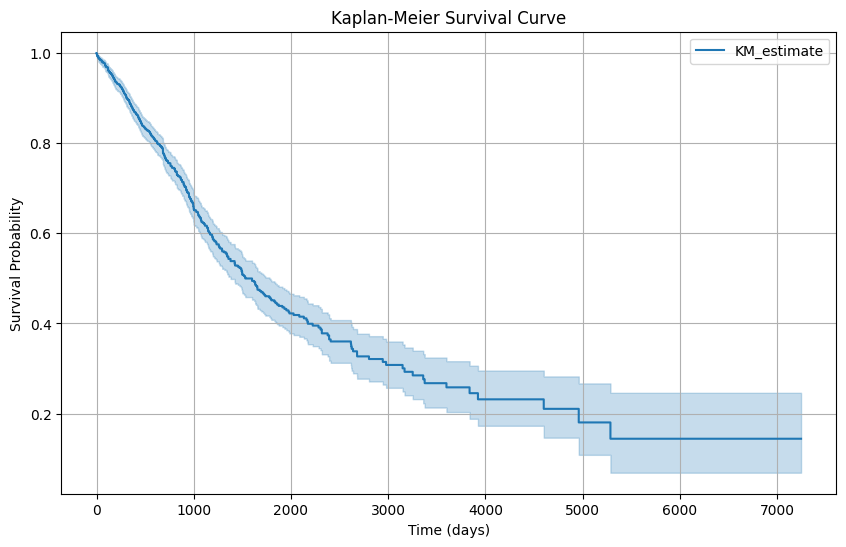

In [ ]:
# Step 1: Install lifelines if not already installed
!pip install lifelines

# Step 2: Import necessary libraries
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Step 3: Drop rows with missing OS.time or OS values
km_df = df_cleaned[['OS.time', 'OS']].dropna()

# Step 4: Convert OS to boolean (1 = event occurred, 0 = censored)
km_df['OS'] = km_df['OS'].astype(bool)

# Step 5: Fit the Kaplan-Meier estimator
kmf = KaplanMeierFitter()
kmf.fit(durations=km_df['OS.time'], event_observed=km_df['OS'])

# Step 6: Plot the survival curve
plt.figure(figsize=(10, 6))
kmf.plot()
plt.title("Kaplan-Meier Survival Curve")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()


In [ ]:
df_cleaned['gender'].value_counts()


,count
gender,
1,801
0,498


<ipython-input-28-693098e97b11>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=labels, y=gender_counts.values, palette='pastel')


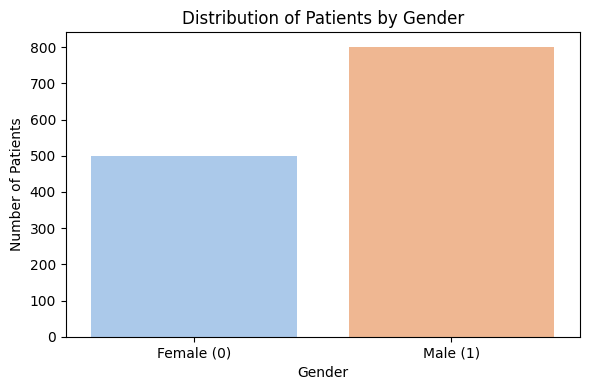

In [ ]:
# Gender mapping: 1 = Male, 0 = Female
gender_counts = df_cleaned['gender'].value_counts().sort_index()
labels = ['Female (0)', 'Male (1)']  # Order corresponds to sorted index

# Plot
plt.figure(figsize=(6, 4))
sns.barplot(x=labels, y=gender_counts.values, palette='pastel')
plt.title('Distribution of Patients by Gender')
plt.ylabel('Number of Patients')
plt.xlabel('Gender')
plt.tight_layout()
plt.show()


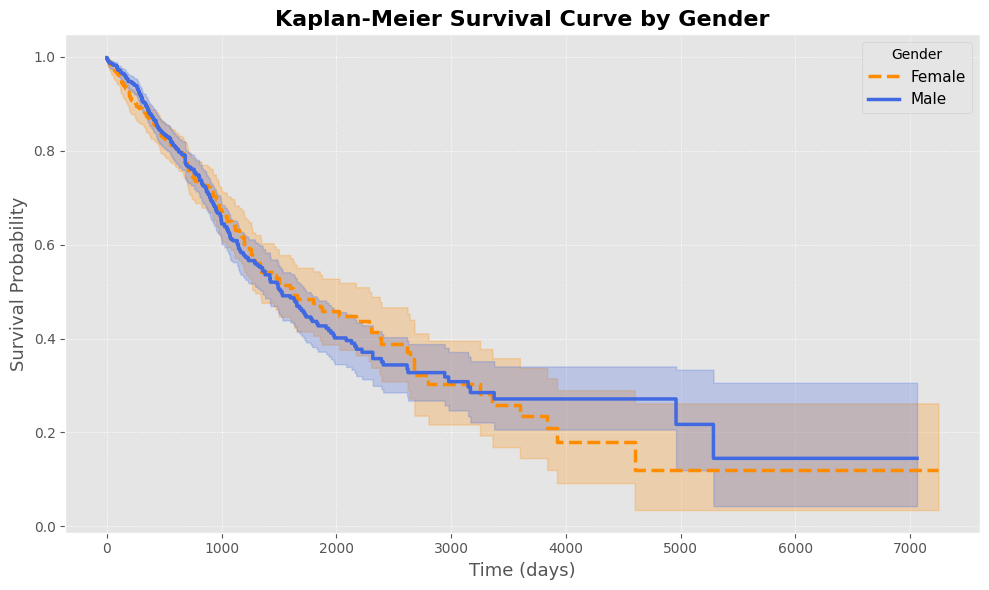

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Prepare data
df_km = df_cleaned[['OS.time', 'OS', 'gender']].dropna()
df_km['OS'] = df_km['OS'].astype(bool)

# Create Kaplan-Meier curves per gender group
kmf = KaplanMeierFitter()

# Custom styling
plt.figure(figsize=(10, 6))
plt.style.use('ggplot')  # Optional: try 'ggplot' or 'bmh' too

colors = {0: 'darkorange', 1: 'royalblue'}  # Assuming 0=Female, 1=Male
linestyles = {0: '--', 1: '-'}  # Customize line style per gender

for group in sorted(df_km['gender'].unique()):
    mask = df_km['gender'] == group
    label = 'Male' if group == 1 else 'Female'
    kmf.fit(df_km[mask]['OS.time'], df_km[mask]['OS'], label=label)
    kmf.plot(ci_show=True, linewidth=2.5, linestyle=linestyles[group], color=colors[group])

# Enhance plot formatting
plt.title("Kaplan-Meier Survival Curve by Gender", fontsize=16, fontweight='bold')
plt.xlabel("Time (days)", fontsize=13)
plt.ylabel("Survival Probability", fontsize=13)
plt.legend(title="Gender", fontsize=11)
plt.grid(True, linestyle=':', linewidth=0.7)
plt.tight_layout()
plt.show()



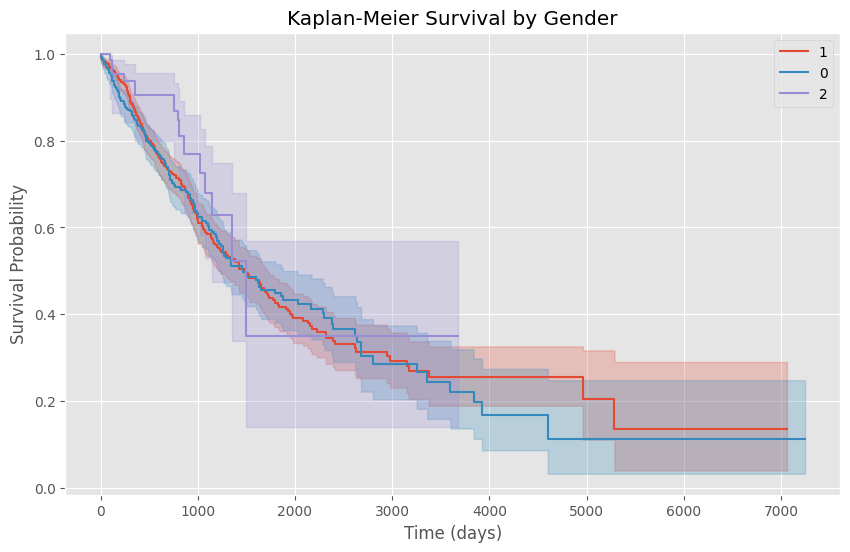

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Prepare data
df_km = df_cleaned[['OS.time', 'OS', 'gender']].dropna()
df_km['OS'] = df_km['OS'].astype(bool)

# Create Kaplan-Meier curves per group
kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))
for group in df_km['gender'].unique():
    mask = df_km['gender'] == group
    kmf.fit(df_km[mask]['OS.time'], df_km[mask]['OS'], label=str(group))
    kmf.plot()

plt.title("Kaplan-Meier Survival by Gender")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()






In [ ]:
# Assuming age bins are already created in a column called 'Age_Group'
# If not, define the bins first:
bins = [0,20,40,60,80, 100]
labels = ['0-20','21-40','41-60','61-80','81-100']
df_cleaned['Age_Group'] = pd.cut(df_cleaned['age_at_initial_pathologic_diagnosis'], bins=bins, labels=labels, right=True)

# Count number of patients in each age group
age_group_counts = df_cleaned['Age_Group'].value_counts().sort_index()
print("Patient count per age group:\n")
print(age_group_counts)


Patient count per age group:

Age_Group
0-20        0
21-40       8
41-60     310
61-80     917
81-100     64
Name: count, dtype: int64


<ipython-input-26-1f3719e4ccb6>:5: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_cleaned['Age_Group'] = pd.cut(df_cleaned['age_at_initial_pathologic_diagnosis'], bins=bins, labels=labels, right=True)


Kaplan meier by age

<ipython-input-29-dd890222d391>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_groups, y=counts, palette='Set2')


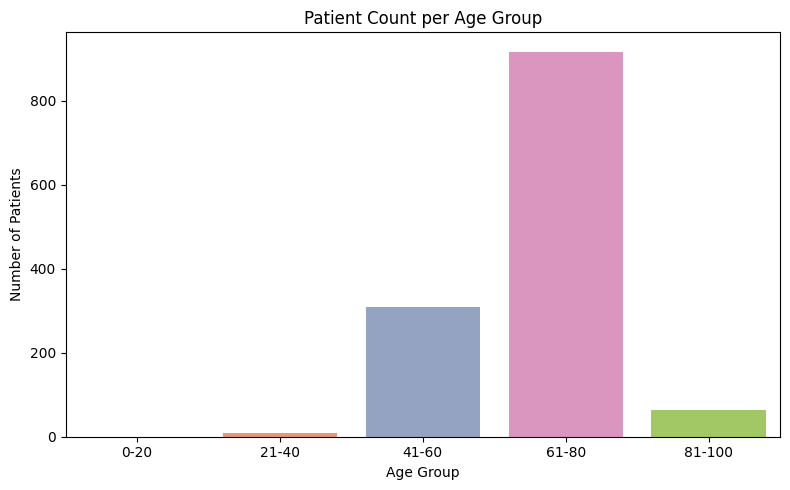

In [ ]:
# Define age group data
age_group_counts = {
    '0-20': 0,
    '21-40': 8,
    '41-60': 310,
    '61-80': 917,
    '81-100': 64
}

# Convert to lists for plotting
age_groups = list(age_group_counts.keys())
counts = list(age_group_counts.values())

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x=age_groups, y=counts, palette='Set2')
plt.title('Patient Count per Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Patients')
plt.tight_layout()
plt.show()

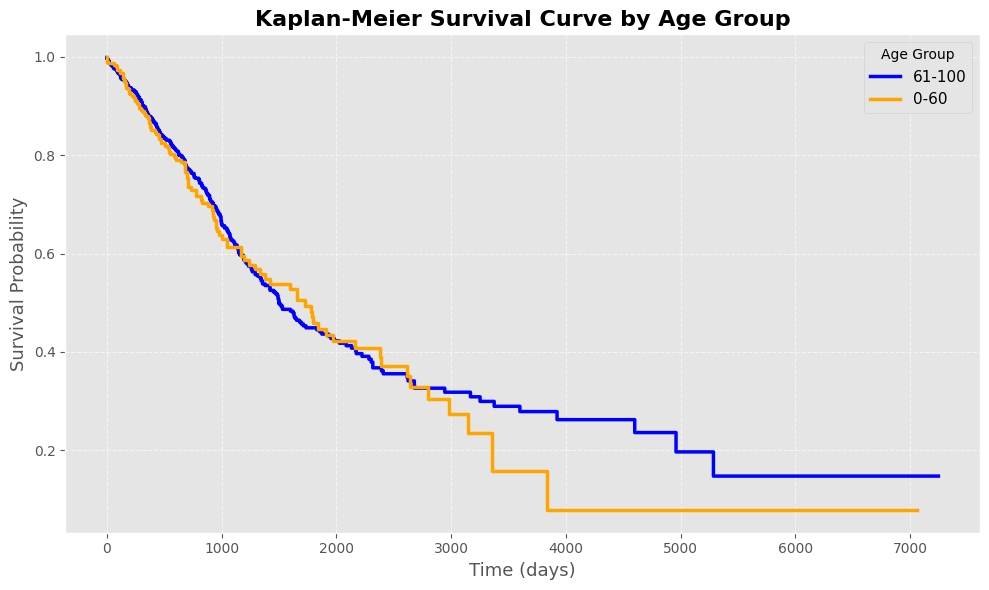

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Step 1: Bin age into 3 groups
bins = [0 , 60,100]
labels = ['0-60', '61-100']
df_cleaned['Age_Group'] = pd.cut(df_cleaned['age_at_initial_pathologic_diagnosis'], bins=bins, labels=labels)

# Step 2: Drop missing values just in case
df_km = df_cleaned[['OS.time', 'OS', 'Age_Group']].dropna()
df_km['OS'] = df_km['OS'].astype(bool)

# Step 3: Kaplan-Meier plot by age group
kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))
colors = ['blue', 'orange', 'green']

for i, group in enumerate(df_km['Age_Group'].unique()):
    mask = df_km['Age_Group'] == group
    kmf.fit(df_km[mask]['OS.time'], df_km[mask]['OS'], label=str(group))
    kmf.plot(ci_show=False, linewidth=2.5, color=colors[i % len(colors)])

# Step 4: Plot styling
plt.title("Kaplan-Meier Survival Curve by Age Group", fontsize=16, fontweight='bold')
plt.xlabel("Time (days)", fontsize=13)
plt.ylabel("Survival Probability", fontsize=13)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(title='Age Group', fontsize=11)
plt.tight_layout()
plt.show()


In [ ]:
# Install scikit-survival
!pip install scikit-survival

# Step 1: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv

# Step 2: Load dataset
df = pd.read_csv("lung_clinical_data.csv")
df_cleaned = df.dropna(axis=1, how='all')

# Step 3: Define features (include gender and residual_tumor now)
features = [
    'PFI.time',
    'days_to_new_tumor_event_after_initial_treatment',
    'age_at_initial_pathologic_diagnosis',

    'gender',
    'residual_tumor',
    'OS.time',
    'OS'
]

# Restore any columns if dropped
for col in features:
    df_cleaned[col] = df[col]

# Step 4: Drop rows missing OS.time or OS (target only)
df_model = df_cleaned[features].dropna(subset=['OS.time', 'OS'])

# Step 5: One-hot encode categorical variables
df_model = pd.get_dummies(df_model, columns=['gender', 'residual_tumor'], drop_first=True)

# Step 6: Separate features and target
X = df_model.drop(columns=['OS.time', 'OS'])
y = Surv.from_dataframe(event='OS', time='OS.time', data=df_model)

# Step 7: Impute missing values in predictors with median
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 8: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 9: Train RSF model
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=42)
rsf.fit(X_train, y_train)

# Step 10: Evaluate
c_index = rsf.score(X_test, y_test)
print(f"Random Survival ForestConcordance Index: {c_index:.3f}")








     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 8.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 14.3 MB/s eta 0:00:00
  Attempting uninstall: osqp
    Found existing installation: osqp 1.0.4
    Uninstalling osqp-1.0.4:
      Successfully uninstalled osqp-1.0.4


<ipython-input-28-0a3a63fa1bc0>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df[col]


Random Survival ForestConcordance Index: 0.840


In [ ]:
# Step 1: Install lifelines
!pip install lifelines

# Step 2: Import libraries
import pandas as pd
from lifelines import CoxPHFitter
from sklearn.impute import SimpleImputer

# Step 3: Load and prepare the data
df = pd.read_csv("lung_clinical_data.csv")
df_cleaned = df.dropna(axis=1, how='all')

# Step 4: Define selected variables
features = [
    'PFI.time',
    'days_to_new_tumor_event_after_initial_treatment',
    'age_at_initial_pathologic_diagnosis',

    'gender',
    'residual_tumor',
    'OS.time',
    'OS'
]

# Restore columns if dropped earlier
for col in features:
    df_cleaned[col] = df[col]

# Step 5: Drop missing rows only from target
df_model = df_cleaned[features].dropna(subset=['OS.time', 'OS'])

# Step 6: One-hot encode categorical columns
df_model = pd.get_dummies(df_model, columns=['gender', 'residual_tumor'], drop_first=True)

# Step 7: Impute missing numeric predictors
X_cols = [col for col in df_model.columns if col not in ['OS', 'OS.time']]
imputer = SimpleImputer(strategy='median')
df_model[X_cols] = imputer.fit_transform(df_model[X_cols])

# Step 8: Fit Cox model
cox = CoxPHFitter()
cox.fit(df_model, duration_col='OS.time', event_col='OS')

# Step 9: Summary of the model
cox.print_summary()


<ipython-input-29-398857bb2c64>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df[col]


<lifelines.CoxPHFitter: fitted with 1130 total observations, 675 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1130
number of events observed = 455
   partial log-likelihood = -2539.16
         time fit was run = 2025-05-23 04:49:47 UTC

---
                                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                        
PFI.time                                        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
days_to_new_tumor_event_after_initial_treatment  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
age_at_initial_pathologic_diagnosis              0.01      1.01      0.01           -0.00            0.02                1.00                1.02
gender_MALE                                     -0.15      0.86      0.10           -0.34            0.04                0.71                1.04
residual_tumor_R1                               -0.26      0.77      0.30           -0.84            0.32                0.43                1.37
residual_tumor_R2                                0.48      1.62      0.45           -0.40            1.37                0.67                3.93
residual_tumor_RX                                0.35      1.41      0.26           -0.16            0.85                0.85                2.34

                                                 cmp to      z      p  -log2(p)
covariate                                                                      
PFI.time                                           0.00 -18.21 <0.005    243.81
days_to_new_tumor_event_after_initial_treatment    0.00   0.89   0.37      1.43
age_at_initial_pathologic_diagnosis                0.00   1.25   0.21      2.25
gender_MALE                                        0.00  -1.53   0.13      2.98
residual_tumor_R1                                  0.00  -0.89   0.38      1.41
residual_tumor_R2                                  0.00   1.07   0.28      1.82
residual_tumor_RX                                  0.00   1.34   0.18      2.48
---
Concordance = 0.90
Partial AIC = 5092.32
log-likelihood ratio test = 523.37 on 7 df
-log2(p) of ll-ratio test = 359.17

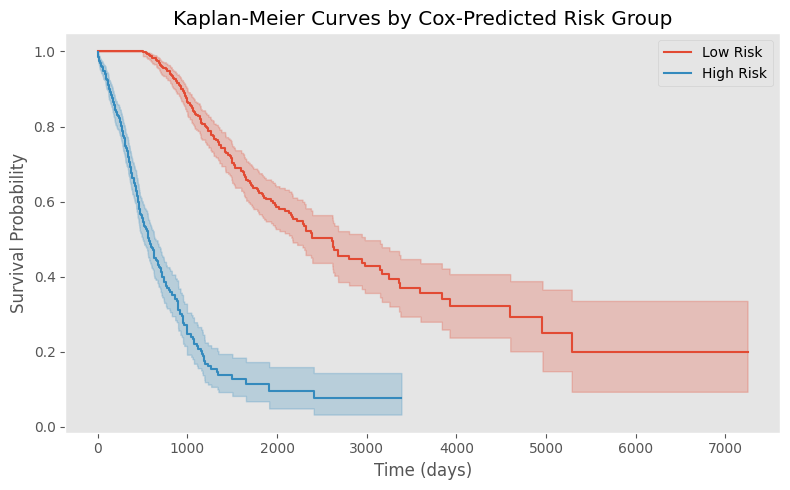

In [ ]:
# Step 10: Predict risk scores (partial hazards)
risk_scores = cox.predict_partial_hazard(df_model)

# Step 11: Stratify into high-risk and low-risk groups using median risk
median_risk = risk_scores.median()
risk_group = risk_scores > median_risk  # True = High risk

# Step 12: Extract survival time and event indicators
time = df_model['OS.time']
event = df_model['OS']

# Step 13: Plot Kaplan-Meier curves
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()

plt.figure(figsize=(8, 5))

# Low-risk group
kmf.fit(durations=time[~risk_group], event_observed=event[~risk_group], label="Low Risk")
ax = kmf.plot_survival_function(ci_show=True)

# High-risk group
kmf.fit(durations=time[risk_group], event_observed=event[risk_group], label="High Risk")
kmf.plot_survival_function(ax=ax, ci_show=True)

plt.title("Kaplan-Meier Curves by Cox-Predicted Risk Group")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid()
plt.tight_layout()
plt.show()


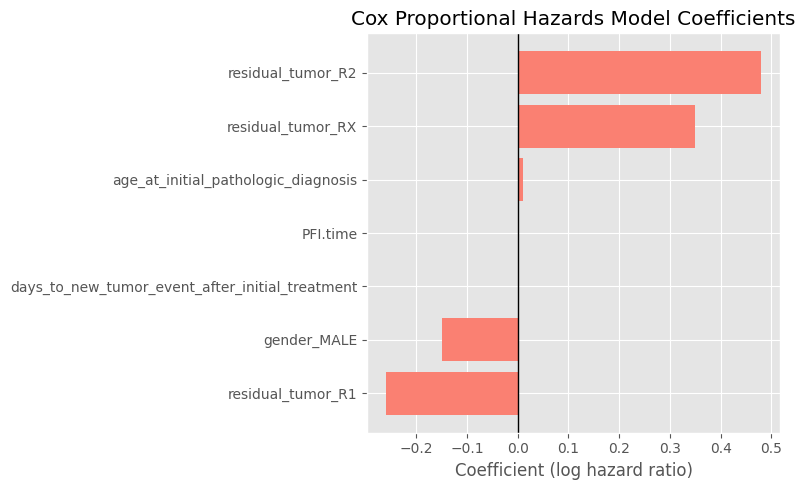

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Manually inputting your Cox model summary into a DataFrame
data = {
    'Feature': [
        'PFI.time',
        'days_to_new_tumor_event_after_initial_treatment',
        'age_at_initial_pathologic_diagnosis',
        'gender_MALE',
        'residual_tumor_R1',
        'residual_tumor_R2',
        'residual_tumor_RX'
    ],
    'Coefficient': [
        -0.00,
         0.00,
         0.01,
        -0.15,
        -0.26,
         0.48,
         0.35
    ]
}

df_coef = pd.DataFrame(data).sort_values(by='Coefficient')

# Plotting
plt.figure(figsize=(8, 5))
plt.barh(df_coef['Feature'], df_coef['Coefficient'], color='salmon')
plt.axvline(x=0, color='black', linewidth=1)
plt.title("Cox Proportional Hazards Model Coefficients")
plt.xlabel("Coefficient (log hazard ratio)")
plt.tight_layout()
plt.show()


In [ ]:
print("Number of rows used to build the Cox model:", df_model.shape[0])


Number of rows used to build the Cox model: 1130


In [ ]:
cox_risk_scores = cox.predict_partial_hazard(X_test)
 # Higher score = higher risk


In [ ]:


# Risk score: 1 - survival probability at a fixed time point (e.g., 1000 days)
rsf_surv_funcs = rsf.predict_survival_function(X_test)
t = 1000  # Choose a meaningful time point
rsf_risk_scores = np.array([1 - fn(t) for fn in rsf_surv_funcs])







In [ ]:
# Use median to split into high- and low-risk groups
median_risk = np.median(rsf_risk_scores)  # or cox_risk_scores

risk_group = rsf_risk_scores > median_risk  # True = High risk, False = Low risk


In [ ]:
X_cols = [col for col in df_model.columns if col not in ['OS', 'OS.time']]
imputer = SimpleImputer(strategy='median')
df_model[X_cols] = imputer.fit_transform(df_model[X_cols])

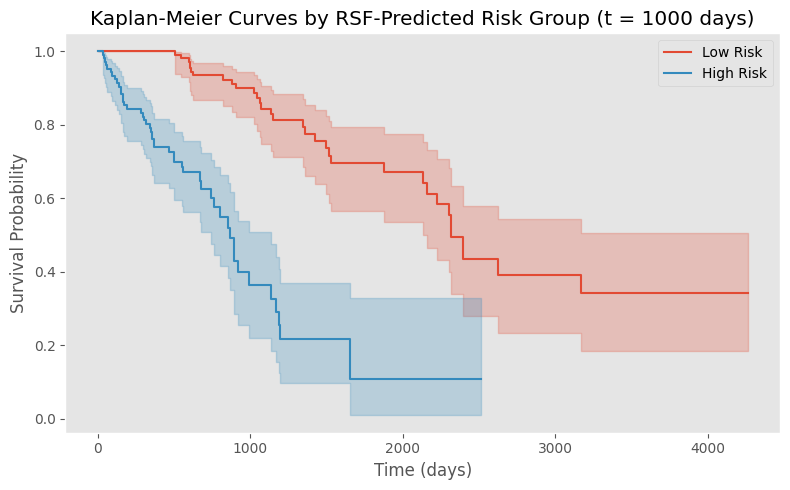

Random Survival Forest Concordance Index: 0.853


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Step 1: Drop rows with missing OS or OS.time
df_clean = df.dropna(subset=["OS", "OS.time"]).copy()

# Step 2: One-hot encode gender and residual_tumor if needed
df_clean = pd.get_dummies(df_clean, columns=["gender", "residual_tumor"], drop_first=False)

# Step 3: Define predictors (you can refine this list if needed)
predictors = [
    'PFI.time',
    'days_to_new_tumor_event_after_initial_treatment',
    'age_at_initial_pathologic_diagnosis'
] + [col for col in df_clean.columns if col.startswith("gender_") or col.startswith("residual_tumor_")]

# Step 4: Impute missing values (median)
imputer = SimpleImputer(strategy="median")
X_full = df_clean[predictors]
X_imputed = pd.DataFrame(imputer.fit_transform(X_full), columns=predictors)

# Step 5: Define survival outcome
y = Surv.from_dataframe("OS", "OS.time", df_clean)

# Step 6: Train-test split
X_train, X_test, y_train, y_test, index_train, index_test = train_test_split(
    X_imputed, y, df_clean.index, test_size=0.2, random_state=42
)

# Step 7: Train Random Survival Forest
rsf_model = RandomSurvivalForest(n_estimators=100,
                                 min_samples_split=10,
                                 min_samples_leaf=15,
                                 max_features="sqrt",
                                 n_jobs=-1,
                                 random_state=42)
rsf_model.fit(X_train, y_train)

# Step 8: Predict survival function for test set at t = 1000 days
rsf_surv_funcs = rsf_model.predict_survival_function(X_test)
t = 1000
rsf_risk_scores = np.array([1 - fn(t) for fn in rsf_surv_funcs])

# Step 9: Stratify into High- and Low-risk groups
median_risk = np.median(rsf_risk_scores)
risk_group = rsf_risk_scores > median_risk  # True = High risk

# Step 10: Extract original survival times and events for test set
test_time = df_clean.loc[index_test, "OS.time"]
test_event = df_clean.loc[index_test, "OS"]

# Step 11: Plot Kaplan-Meier curves
kmf = KaplanMeierFitter()

plt.figure(figsize=(8, 5))

# Low risk group
kmf.fit(durations=test_time[~risk_group], event_observed=test_event[~risk_group], label="Low Risk")
ax = kmf.plot_survival_function(ci_show=True)

# High risk group
kmf.fit(durations=test_time[risk_group], event_observed=test_event[risk_group], label="High Risk")
kmf.plot_survival_function(ax=ax, ci_show=True)

plt.title("Kaplan-Meier Curves by RSF-Predicted Risk Group (t = 1000 days)")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid()
plt.tight_layout()
plt.show()

# C-index on test set
c_index = rsf_model.score(X_test, y_test)

print(f"Random Survival Forest Concordance Index: {c_index:.3f}")



In [ ]:
# Step 1: Install scikit-survival if not already installed
# !pip install scikit-survival
!pip install scikit-survival --quiet

# Step 2: Import libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sksurv.ensemble import RandomSurvivalForest
from sksurv.util import Surv

# Step 3: Load and clean dataset
df = pd.read_csv("lung_clinical_data.csv")
df_cleaned = df.dropna(axis=1, how='all')  # Drop completely empty columns

# Step 4: Define features
features = [
    'PFI.time',
    'days_to_new_tumor_event_after_initial_treatment',
    'age_at_initial_pathologic_diagnosis',
    'gender',
    'residual_tumor',
    'OS.time',
    'OS'
]

df_model = df_cleaned[features].dropna(subset=['OS.time', 'OS']).copy()

# Step 5: Label encode 'gender'
le = LabelEncoder()
df_model['gender_encoded'] = le.fit_transform(df_model['gender'])

# Step 6: One-hot encode 'residual_tumor'
df_model = pd.get_dummies(df_model, columns=['residual_tumor'], drop_first=False)

# Step 7: Create final feature matrix
X = df_model.drop(columns=['gender', 'OS', 'OS.time'])  # drop raw gender and targets
X['gender'] = df_model['gender_encoded']  # add back encoded gender

# Step 8: Create target variable for survival
y = Surv.from_dataframe(event='OS', time='OS.time', data=df_model)

# Step 9: Impute missing values with median
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 10: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)

# Step 11: Train Random Survival Forest
rsf = RandomSurvivalForest(n_estimators=100,
                           min_samples_split=10,
                           min_samples_leaf=15,
                           max_features="sqrt",
                           n_jobs=-1,
                           random_state=42)
rsf.fit(X_train, y_train)

# Step 12: Evaluate C-index
c_index = rsf.score(X_test, y_test)
print(f"RSF Concordance Index: {c_index:.3f}")


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.9/48.9 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 33.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.3/298.3 kB 21.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 220.1/220.1 kB 15.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 45.3 MB/s eta 0:00:00
RSF Concordance Index: 0.860


Random Survival Forest (RSF) Concordance Index: 0.860


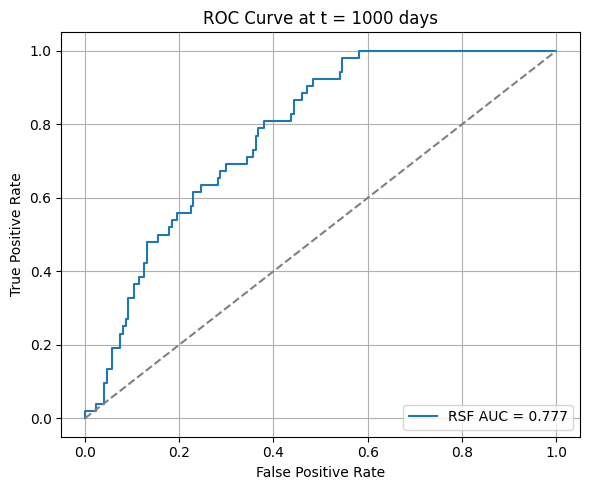

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Choose a fixed time point
t = 1000  # days

# Step 2: Predict survival function for test set
rsf_surv_funcs = rsf.predict_survival_function(X_test)

# Step 3: Convert survival function to risk score at time t
# Risk = 1 - Survival probability at time t
risk_scores = np.array([1 - fn(t) for fn in rsf_surv_funcs])

# Step 4: Create true binary labels: event occurred before t and was observed
# True = died before t and event was observed (not censored)
y_event = np.array([event for event, _ in y_test])
y_time = np.array([time for _, time in y_test])
y_true = (y_event == True) & (y_time <= t)

# Step 5: Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, risk_scores)
roc_auc = auc(fpr, tpr)
print(f"Random Survival Forest (RSF) Concordance Index: {c_index:.3f}")
# Step 6: Plot ROC curve
plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"RSF AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve at t = {t} days")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


NotImplementedError: 

In [ ]:
import numpy as np
# Step 1: Drop gender + residual_tumor raw
df_model = df_cleaned[features].dropna(subset=['OS.time', 'OS']).copy()
df_model['gender_encoded'] = LabelEncoder().fit_transform(df_model['gender'])
df_model = pd.get_dummies(df_model, columns=['residual_tumor'], drop_first=True)

# Step 2: Build X, y
X = df_model.drop(columns=['gender', 'OS', 'OS.time'])
X['gender'] = df_model['gender_encoded']
X['OS.time'] = df_model['OS.time']
X['OS'] = df_model['OS']

# Step 3: Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 4: Remove highly correlated features (correlation > 0.95)
corr_matrix = X_imputed.drop(columns=['OS', 'OS.time']).corr().abs()
upper_triangle = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper_triangle.columns if any(upper_triangle[column] > 0.95)]

print("Highly correlated columns being dropped:", to_drop)

X_filtered = X_imputed.drop(columns=to_drop)

from lifelines import CoxPHFitter

cph = CoxPHFitter()
cph.fit(X_filtered, duration_col='OS.time', event_col='OS')
cph.print_summary()

print(f"Concordance Index (C-index): {cph.concordance_index_:.3f}")



Highly correlated columns being dropped: ['gender']


<lifelines.CoxPHFitter: fitted with 1130 total observations, 675 right-censored observations>
             duration col = 'OS.time'
                event col = 'OS'
      baseline estimation = breslow
   number of observations = 1130
number of events observed = 455
   partial log-likelihood = -2536.49
         time fit was run = 2025-05-25 10:32:59 UTC

---
                                                 coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                                        
PFI.time                                        -0.00      1.00      0.00           -0.00           -0.00                1.00                1.00
days_to_new_tumor_event_after_initial_treatment  0.00      1.00      0.00           -0.00            0.00                1.00                1.00
age_at_initial_pathologic_diagnosis              0.01      1.01      0.01           -0.00            0.02                1.00                1.02
gender_encoded                                  -0.23      0.80      0.08           -0.39           -0.07                0.68                0.94
residual_tumor_R1                               -0.29      0.75      0.29           -0.87            0.29                0.42                1.33
residual_tumor_R2                                0.46      1.58      0.45           -0.43            1.34                0.65                3.82
residual_tumor_RX                                0.32      1.38      0.26           -0.18            0.82                0.83                2.28

                                                 cmp to      z      p  -log2(p)
covariate                                                                      
PFI.time                                           0.00 -18.33 <0.005    246.88
days_to_new_tumor_event_after_initial_treatment    0.00   0.74   0.46      1.12
age_at_initial_pathologic_diagnosis                0.00   1.26   0.21      2.28
gender_encoded                                     0.00  -2.76   0.01      7.42
residual_tumor_R1                                  0.00  -0.99   0.32      1.63
residual_tumor_R2                                  0.00   1.01   0.31      1.68
residual_tumor_RX                                  0.00   1.25   0.21      2.25
---
Concordance = 0.90
Partial AIC = 5086.97
log-likelihood ratio test = 528.72 on 7 df
-log2(p) of ll-ratio test = 363.00

Concordance Index (C-index): 0.900


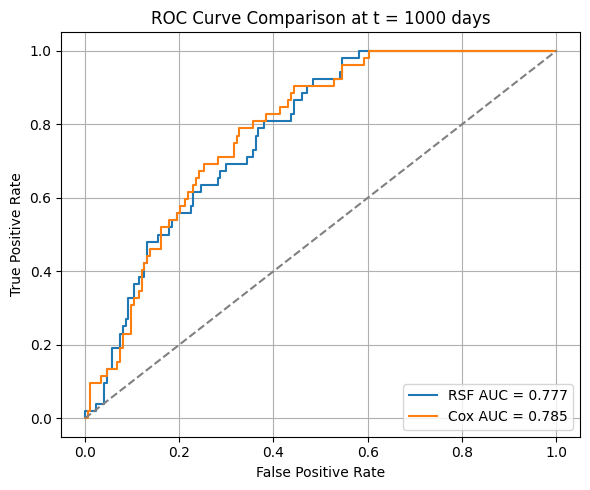

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

t = 1000  # Time point for prediction

# --- RSF ---
rsf_surv_funcs = rsf.predict_survival_function(X_test)
rsf_risk_scores = np.array([1 - fn(t) for fn in rsf_surv_funcs])

# --- Cox ---
# Predict partial hazards (higher = higher risk)
cox_partial_hazards = cph.predict_partial_hazard(X_test)
cox_risk_scores = cox_partial_hazards.values.ravel()

# --- True labels ---
y_event = np.array([event for event, _ in y_test])
y_time = np.array([time for _, time in y_test])
y_true = (y_event == True) & (y_time <= t)

# --- ROC: RSF ---
fpr_rsf, tpr_rsf, _ = roc_curve(y_true, rsf_risk_scores)
auc_rsf = auc(fpr_rsf, tpr_rsf)

# --- ROC: Cox ---
fpr_cox, tpr_cox, _ = roc_curve(y_true, cox_risk_scores)
auc_cox = auc(fpr_cox, tpr_cox)

# --- Plot ROC curves ---
plt.figure(figsize=(6, 5))
plt.plot(fpr_rsf, tpr_rsf, label=f"RSF AUC = {auc_rsf:.3f}")
plt.plot(fpr_cox, tpr_cox, label=f"Cox AUC = {auc_cox:.3f}")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title(f"ROC Curve Comparison at t = {t} days")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
fpr_rsf, tpr_rsf, thresholds_rsf = roc_curve(y_true, rsf_risk_scores)
print(f"RSF: {len(thresholds_rsf)} ROC points")

fpr_cox, tpr_cox, thresholds_cox = roc_curve(y_true, cox_risk_scores)
print(f"Cox: {len(thresholds_cox)} ROC points")


RSF: 82 ROC points
Cox: 82 ROC points


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Get feature importances
importances = rsf.feature_importances_

# Create a DataFrame for better formatting
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Feature Importance")
plt.title("Random Survival Forest: Feature Importances")
plt.tight_layout()
plt.show()


NotImplementedError: 

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)


In [ ]:
print(df.isnull().sum())

OS                                    154
OS.time                               169
DSS                                   246
DSS.time                              169
DFI                                   611
                                     ... 
_GENOMIC_ID_TCGA_LUNG_gistic2thd      282
_GENOMIC_ID_TCGA_LUNG_G4502A_07_3    1111
_GENOMIC_ID_TCGA_LUNG_exp_HiSeqV2     170
_GENOMIC_ID_TCGA_LUNG_gistic2         282
_GENOMIC_ID_TCGA_LUNG_RPPA_RBN        867
Length: 143, dtype: int64


In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Make sure you have the original survival data
time = df_encoded.loc[X_test.index, "OS.time"]
event = df_encoded.loc[X_test.index, "OS"]

# Initialize KM fitter
kmf = KaplanMeierFitter()

# Plot for Low Risk
kmf.fit(durations=time[~risk_group], event_observed=event[~risk_group], label="Low Risk")
ax = kmf.plot_survival_function()

# Plot for High Risk
kmf.fit(durations=time[risk_group], event_observed=event[risk_group], label="High Risk")
kmf.plot_survival_function(ax=ax)

# Decorate the plot
plt.title("Kaplan-Meier Survival Curves by Predicted Risk Group")
plt.xlabel("Time (days)")
plt.ylabel("Survival Probability")
plt.grid()
plt.tight_layout()
plt.show()


TypeError: NaNs were detected in the dataset. Try using pd.isnull to find the problematic values.